In [1]:
# importing python packages
import pandas as pd
import seaborn as sns

In [20]:
# importing previous worked on imdb csv
imdb_df = pd.read_csv('imdb_df.csv')
imdb_df

,movie_id,title,year,genres,runtime,person_id,name,category,averagerating,numvotes
0,tt7131622,once upon a time ... in hollywood,2019,Comedy,159.0,nm0000093,Brad Pitt,actor,9.7,5600
1,tt7131622,once upon a time ... in hollywood,2019,Drama,159.0,nm0000093,Brad Pitt,actor,9.7,5600
2,tt7131622,once upon a time ... in hollywood,2019,Comedy,159.0,nm0000138,Leonardo DiCaprio,actor,9.7,5600
3,tt7131622,once upon a time ... in hollywood,2019,Drama,159.0,nm0000138,Leonardo DiCaprio,actor,9.7,5600
4,tt7131622,once upon a time ... in hollywood,2019,Comedy,159.0,nm0000233,Quentin Tarantino,director,9.7,5600
...,...,...,...,...,...,...,...,...,...,...
82675,tt4404474,potato salad,2015,Horror,81.0,nm5756431,Torge Oelrich,actor,1.3,6249
82676,tt4404474,potato salad,2015,Comedy,81.0,nm6074215,Hauke Schlichting,producer,1.3,6249
82677,tt4404474,potato salad,2015,Horror,81.0,nm6074215,Hauke Schlichting,producer,1.3,6249
82678,tt4404474,potato salad,2015,Comedy,81.0,nm8069441,Ernst-Herbert Albertsen,actor,1.3,6249


In [21]:
# importing previous worked on the numbers csv
tn_df = pd.read_csv('tn_df.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,month
0,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,2011,May
1,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,2019,Jun
2,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963,2015,May
3,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747,2017,Dec
4,6,"Dec 18, 2015",star wars ep. vii: the force awakens,306000000,936662225,2053311220,2015,Dec
...,...,...,...,...,...,...,...,...
2189,62,"Dec 31, 2014",stories of our lives,15000,0,0,2014,Dec
2190,72,"May 19, 2015",family motocross,10000,0,0,2015,May
2191,73,"Jan 13, 2012",newlyweds,9000,4584,4584,2012,Jan
2192,78,"Dec 31, 2018",red 11,7000,0,0,2018,Dec


In [4]:
# merging the two dataframes 
df = imdb_df.merge(tn_df, how = 'inner', left_on = 'title', right_on = 'movie')
df.head()

,movie_id,title,year,genres,runtime,person_id,name,category,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,month
0,tt1375666,inception,2010,Action,148.0,nm0000138,Leonardo DiCaprio,actor,8.8,1841066,38,"Jul 16, 2010",inception,160000000,292576195,835524642,2010,Jul
1,tt1375666,inception,2010,Adventure,148.0,nm0000138,Leonardo DiCaprio,actor,8.8,1841066,38,"Jul 16, 2010",inception,160000000,292576195,835524642,2010,Jul
2,tt1375666,inception,2010,Sci-Fi,148.0,nm0000138,Leonardo DiCaprio,actor,8.8,1841066,38,"Jul 16, 2010",inception,160000000,292576195,835524642,2010,Jul
3,tt1375666,inception,2010,Action,148.0,nm0330687,Joseph Gordon-Levitt,actor,8.8,1841066,38,"Jul 16, 2010",inception,160000000,292576195,835524642,2010,Jul
4,tt1375666,inception,2010,Adventure,148.0,nm0330687,Joseph Gordon-Levitt,actor,8.8,1841066,38,"Jul 16, 2010",inception,160000000,292576195,835524642,2010,Jul


In [5]:
# dropping unnecessary columns
drop = ['movie_id', 'person_id', 'id', 'year', 'movie']
df.drop(columns = drop, inplace = True)
df.head()

,title,genres,runtime,name,category,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,Year,month
0,inception,Action,148.0,Leonardo DiCaprio,actor,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,Jul
1,inception,Adventure,148.0,Leonardo DiCaprio,actor,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,Jul
2,inception,Sci-Fi,148.0,Leonardo DiCaprio,actor,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,Jul
3,inception,Action,148.0,Joseph Gordon-Levitt,actor,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,Jul
4,inception,Adventure,148.0,Joseph Gordon-Levitt,actor,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,Jul


In [6]:
# creating calculated columns
df['worldwide_profit'] = df['worldwide_gross'] - df['production_budget']
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['worldwide_profit_margin_%'] = (df['worldwide_profit']/df['worldwide_gross'] * 100).round(2)
df['domestic_profit_margin_%'] = (df['domestic_profit']/df['domestic_gross'] * 100).round(2)

In [7]:
# Taking a look at the descriptive statistics
df.describe()

,runtime,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Year,worldwide_profit,domestic_profit,worldwide_profit_margin_%,domestic_profit_margin_%
count,26377.000000,26377.000000,2.637700e+04,2.637700e+04,2.637700e+04,2.637700e+04,26377.000000,2.637700e+04,2.637700e+04,2.637700e+04,2.637700e+04
mean,108.165523,6.339754,1.259332e+05,4.753372e+07,6.007551e+07,1.510199e+08,2014.007999,1.034861e+08,1.254180e+07,-inf,-inf
std,16.868487,0.990979,1.662380e+05,5.666229e+07,8.628454e+07,2.402346e+08,2.600930,1.997021e+08,6.171516e+07,NaN,NaN
min,63.000000,1.600000,1.003000e+03,9.000000e+03,0.000000e+00,0.000000e+00,2010.000000,-2.002376e+08,-3.072376e+08,-inf,-inf
25%,95.000000,5.800000,2.329500e+04,1.000000e+07,6.797696e+06,1.176696e+07,2012.000000,-7.000000e+05,-1.175218e+07,-1.603101e+01,-1.484710e+02
50%,106.000000,6.400000,6.964800e+04,2.600000e+07,3.144501e+07,6.144914e+07,2014.000000,2.868098e+07,-5.174400e+04,5.491767e+01,-1.500585e+00
75%,118.000000,7.000000,1.605340e+05,6.000000e+07,7.268861e+07,1.704664e+08,2016.000000,1.134531e+08,2.434060e+07,7.607806e+01,5.106716e+01
max,192.000000,8.800000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,1.748134e+09,5.000596e+08,9.975994e+01,9.956072e+01


**Notice:** The Worldwide and doemstic profit margins columns have **-inf and NaN** values

**Reason:** There are rows in the gross budget columns that have a value of **0**

**Need to get rid of those rows**

In [8]:
# dropping rows with gross that is less than or equal to zero
# also changing the profit margin columns from float to integer
grossiszero = df[(df['worldwide_gross'] <= 0) | (df['domestic_gross'] <= 0)]
df.drop(grossiszero.index, inplace = True)
df.reset_index(drop = True, inplace = True)

In [9]:
# new descriptive statistics
df.describe()

,runtime,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Year,worldwide_profit,domestic_profit,worldwide_profit_margin_%,domestic_profit_margin_%
count,24546.000000,24546.000000,2.454600e+04,2.454600e+04,2.454600e+04,2.454600e+04,24546.000000,2.454600e+04,2.454600e+04,24546.000000,24546.000000
mean,108.904139,6.423352,1.341493e+05,5.031282e+07,6.455682e+07,1.622084e+08,2013.997922,1.118956e+08,1.424400e+07,-516.674739,-3527.399562
std,16.911168,0.926569,1.692517e+05,5.762951e+07,8.781283e+07,2.453838e+08,2.638889,2.044986e+08,6.350945e+07,5034.804970,41142.930842
min,63.000000,1.600000,1.003000e+03,9.000000e+03,5.280000e+02,5.280000e+02,2010.000000,-2.002376e+08,-3.072376e+08,-94596.969697,-937400.000000
25%,96.000000,5.800000,3.064500e+04,1.000000e+07,1.116329e+07,1.859423e+07,2012.000000,1.495262e+06,-1.175218e+07,12.839762,-88.952735
50%,106.000000,6.500000,7.744350e+04,3.000000e+07,3.581956e+07,6.969850e+07,2014.000000,3.623450e+07,1.659955e+06,57.887315,6.800705
75%,118.000000,7.100000,1.700890e+05,6.500000e+07,7.904244e+07,1.904531e+08,2016.000000,1.236173e+08,2.681666e+07,76.760550,53.113559
max,192.000000,8.800000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,1.748134e+09,5.000596e+08,99.759941,99.560718


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24546 entries, 0 to 24545
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      24546 non-null  object 
 1   genres                     24546 non-null  object 
 2   runtime                    24546 non-null  float64
 3   name                       24546 non-null  object 
 4   category                   24546 non-null  object 
 5   averagerating              24546 non-null  float64
 6   numvotes                   24546 non-null  int64  
 7   release_date               24546 non-null  object 
 8   production_budget          24546 non-null  int64  
 9   domestic_gross             24546 non-null  int64  
 10  worldwide_gross            24546 non-null  int64  
 11  Year                       24546 non-null  int64  
 12  month                      24546 non-null  object 
 13  worldwide_profit           24546 non-null  int

**All Better**

Can do a pairplot and heatmap of the numeric columns now!!

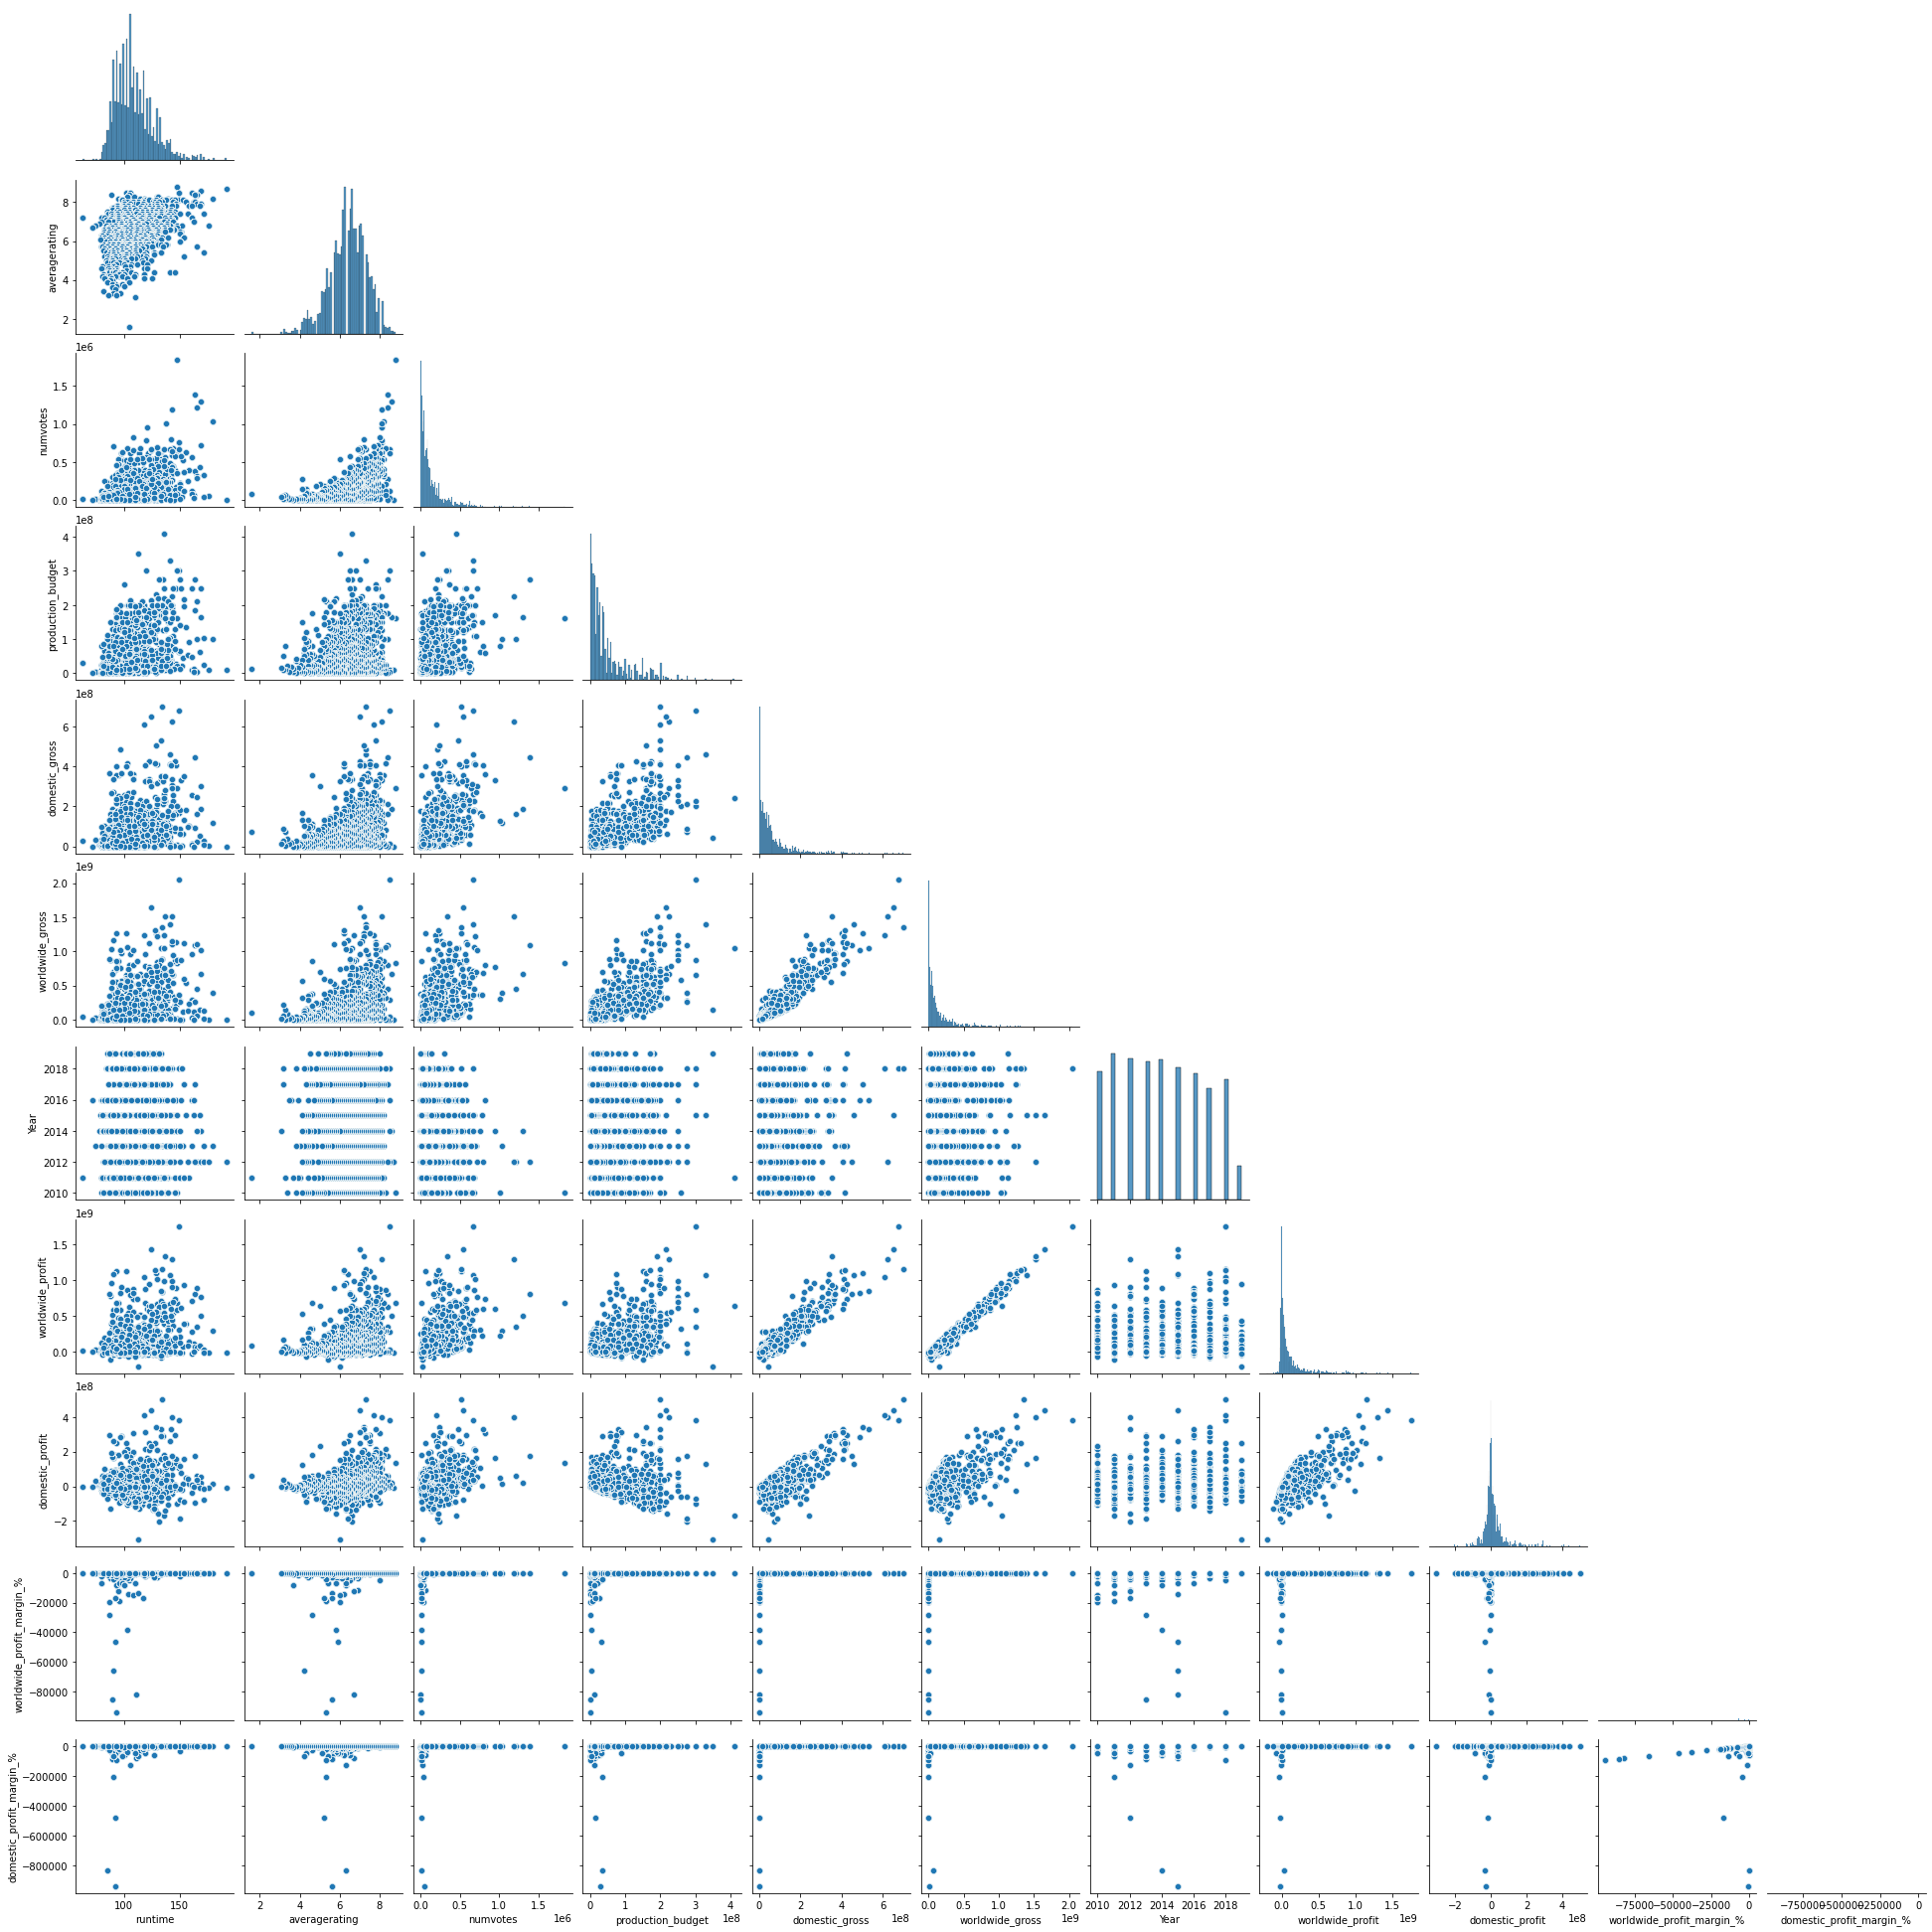

In [11]:
# creating pairplot of all numeric
sns.pairplot(df, corner = True);

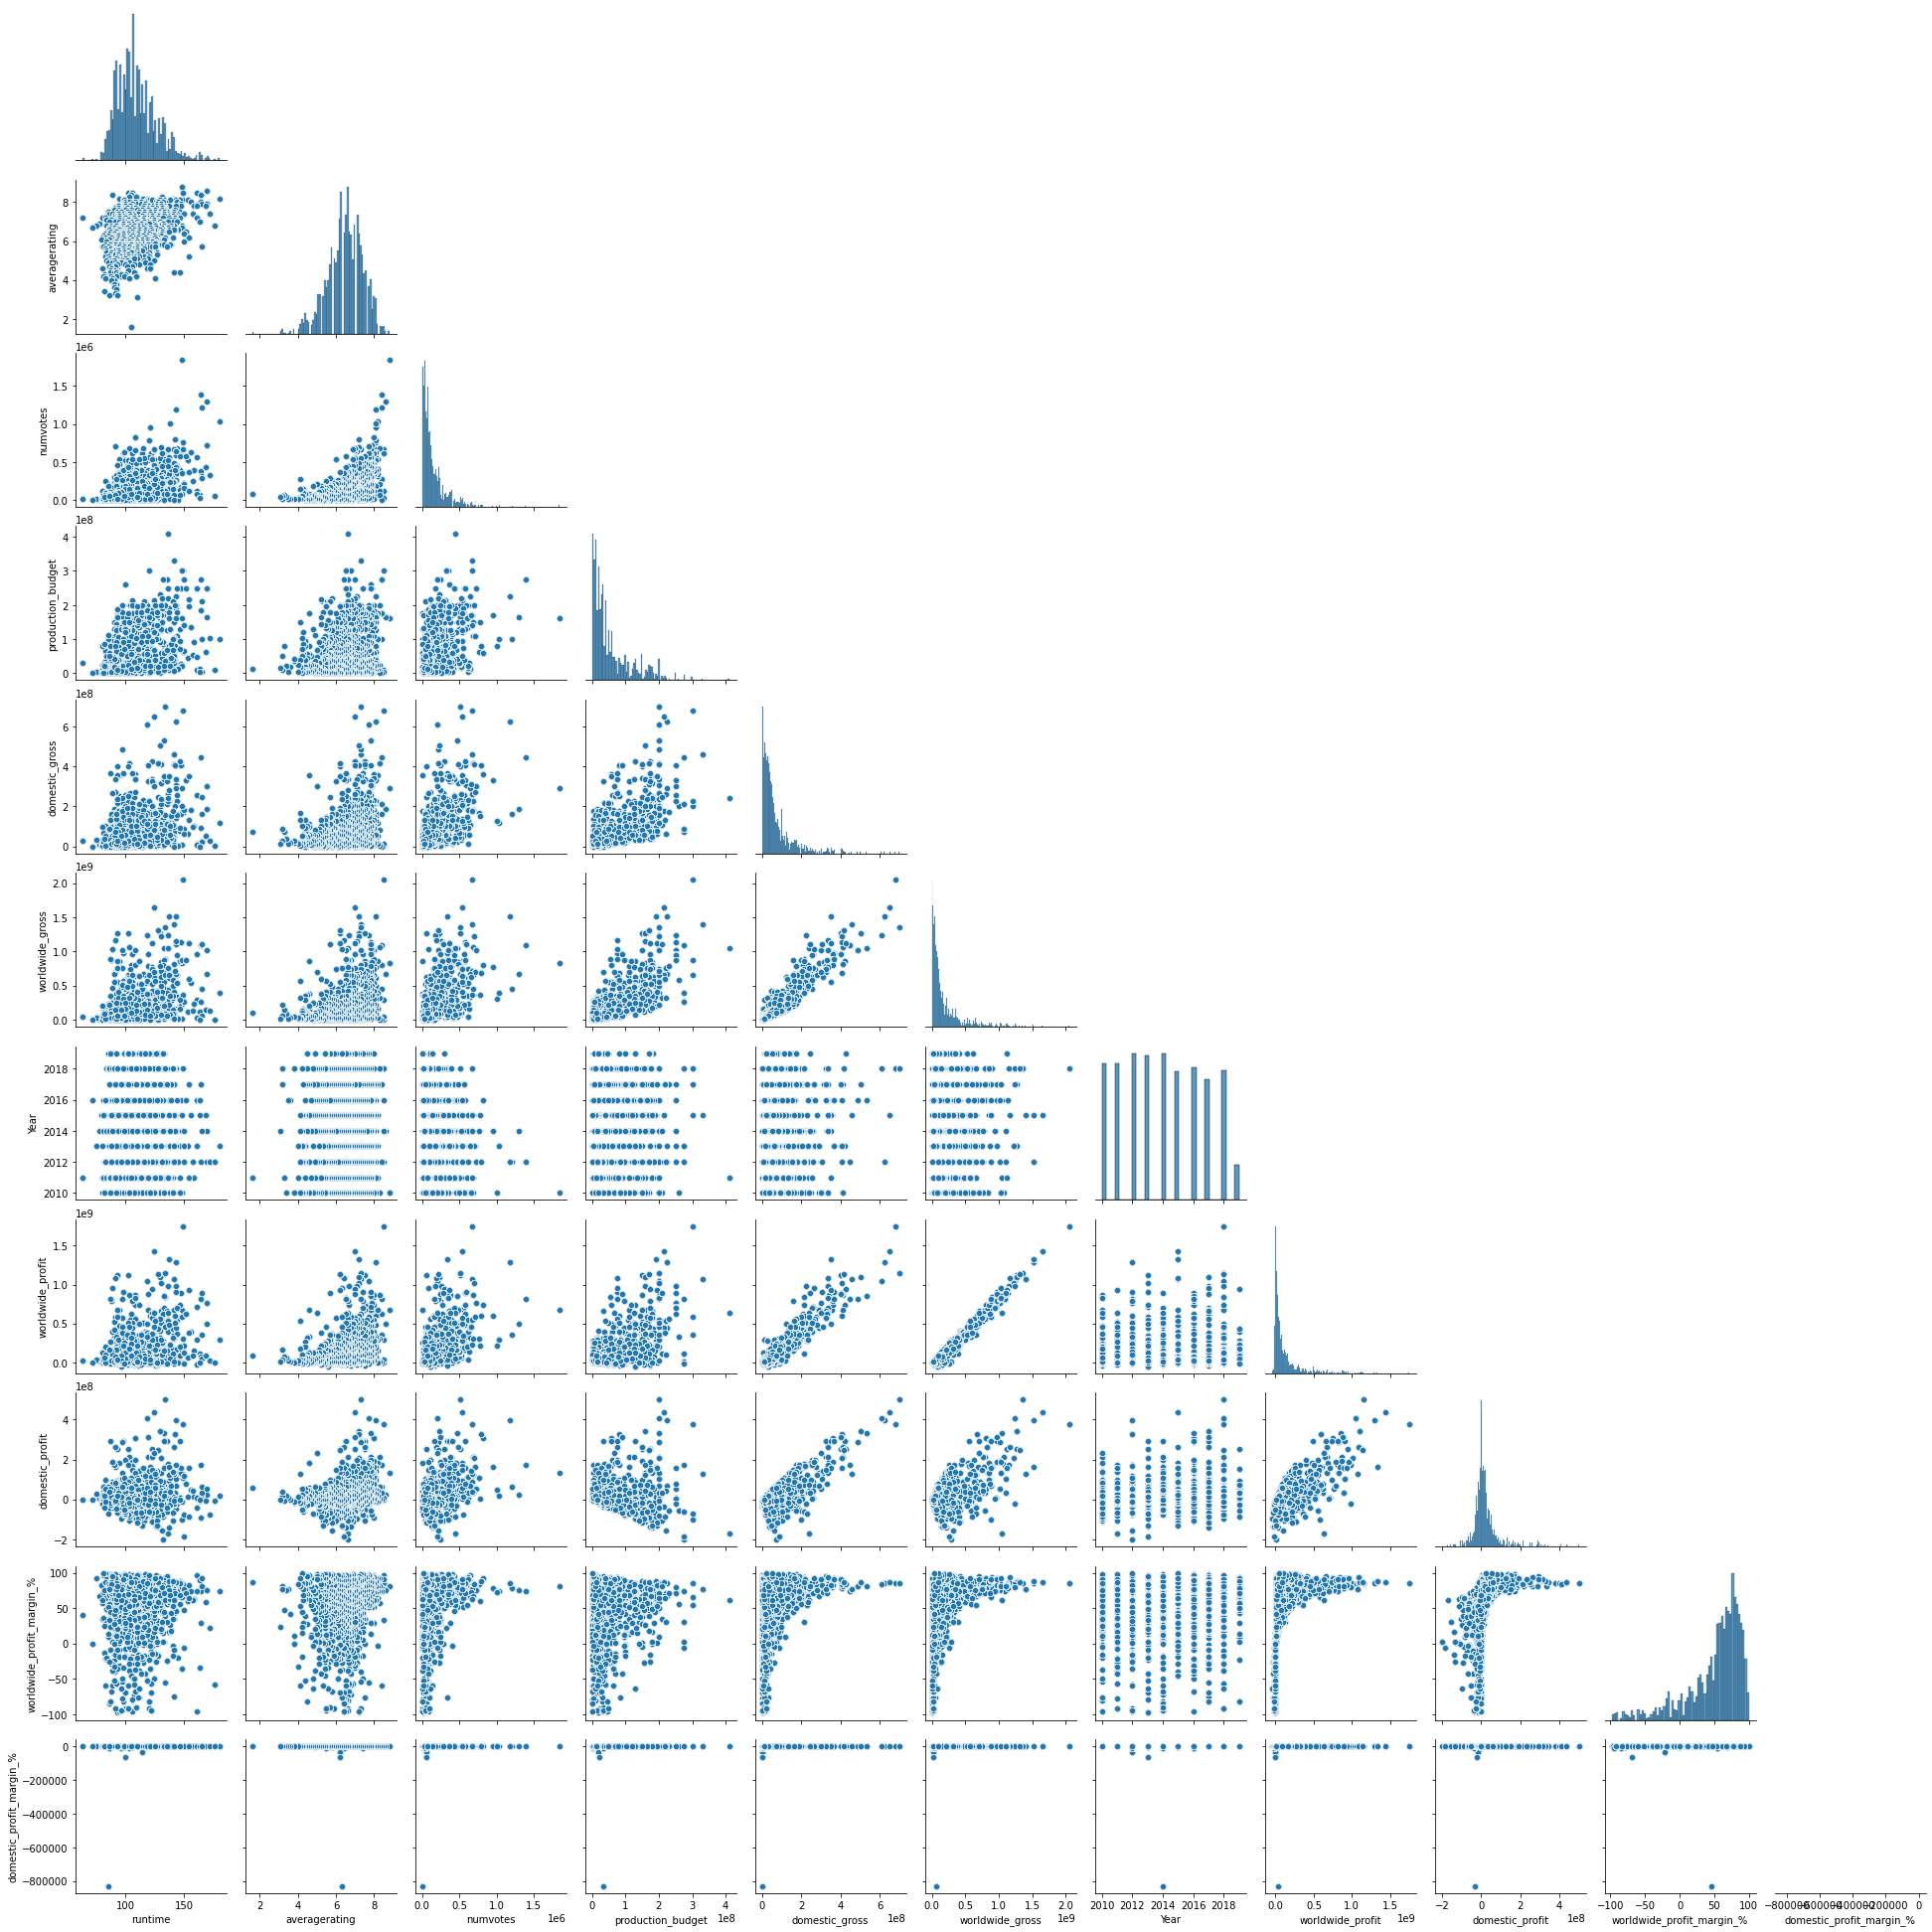

In [19]:
# creating a pairplot of numeric values with certain profit margin conditions leaving out a lot of extrememly poor movies
condition1 = df['worldwide_profit_margin_%'] >= -100.00
condition2 = df['domestic_profit_margin_%'] >= -100.00
df2 = df[(condition1) | (condition2)]
sns.pairplot(df2, corner = True);

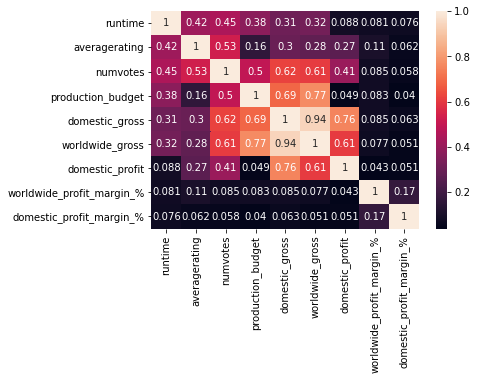

In [26]:
numeric_list = ['runtime', 'averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross', 
'domestic_profit', 'worldwide_profit_margin_%', 'domestic_profit_margin_%']
sns.heatmap(df[numeric_list].corr(), annot = True);

In [27]:
df.to_csv('movie_combined_data.csv')